<a href="https://www.kaggle.com/code/asilbekjon/customer-churn?scriptVersionId=245465992" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/binaryclassificationwithabankchurndataset/sample_submission.csv
/kaggle/input/binaryclassificationwithabankchurndataset/train.csv
/kaggle/input/binaryclassificationwithabankchurndataset/test.csv


Import 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

Dataset

In [3]:
df=pd.read_csv('/kaggle/input/binaryclassificationwithabankchurndataset/train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [4]:
test=pd.read_csv('/kaggle/input/binaryclassificationwithabankchurndataset/test.csv')
test.drop(["Surname",'CustomerId'],axis=1,inplace=True)

Data Cleaning

In [5]:
##data cleaning
df.drop(['Surname','CustomerId','id'],axis=1,inplace=True)

#NaN values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,657.856800,37.710133,5.018667,42338.107539,1.590533,0.779133,0.496000,116944.059867,0.198467
std,72.678739,8.144880,2.787407,59703.047751,0.525822,0.414845,0.500001,46047.485455,0.398859
min,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82644.332500,0.000000
50%,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,122449.420000,0.000000
75%,707.000000,42.000000,7.000000,109636.342500,2.000000,1.000000,1.000000,155703.022500,0.000000
max,850.000000,72.000000,10.000000,187911.550000,5.000000,1.000000,1.000000,885120.790000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      15000 non-null  float64
 1   Geography        15000 non-null  object 
 2   Gender           15000 non-null  object 
 3   Age              15000 non-null  float64
 4   Tenure           15000 non-null  float64
 5   Balance          15000 non-null  float64
 6   NumOfProducts    15000 non-null  float64
 7   HasCrCard        15000 non-null  float64
 8   IsActiveMember   15000 non-null  float64
 9   EstimatedSalary  15000 non-null  float64
 10  Exited           15000 non-null  float64
dtypes: float64(9), object(2)
memory usage: 1.3+ MB


Visualization

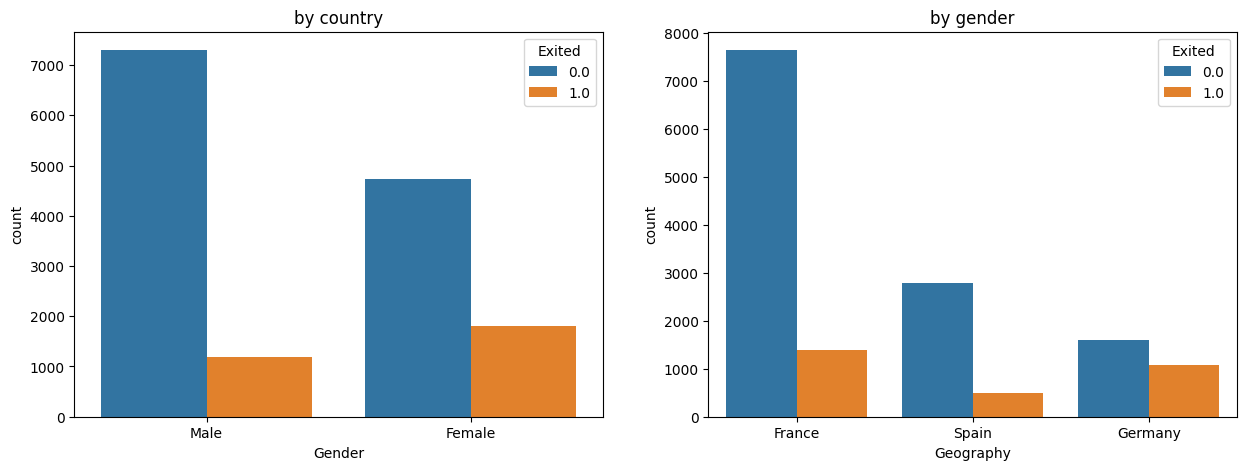

In [8]:
# categorical columns
fig, axes = plt.subplots(1,2 ,figsize=(15,5))

sns.countplot(x='Gender', hue='Exited', data=df, ax=axes[0])
axes[1].set_title("by gender")

sns.countplot(x='Geography', hue='Exited', data=df, ax=axes[1])
axes[0].set_title("by country")

plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

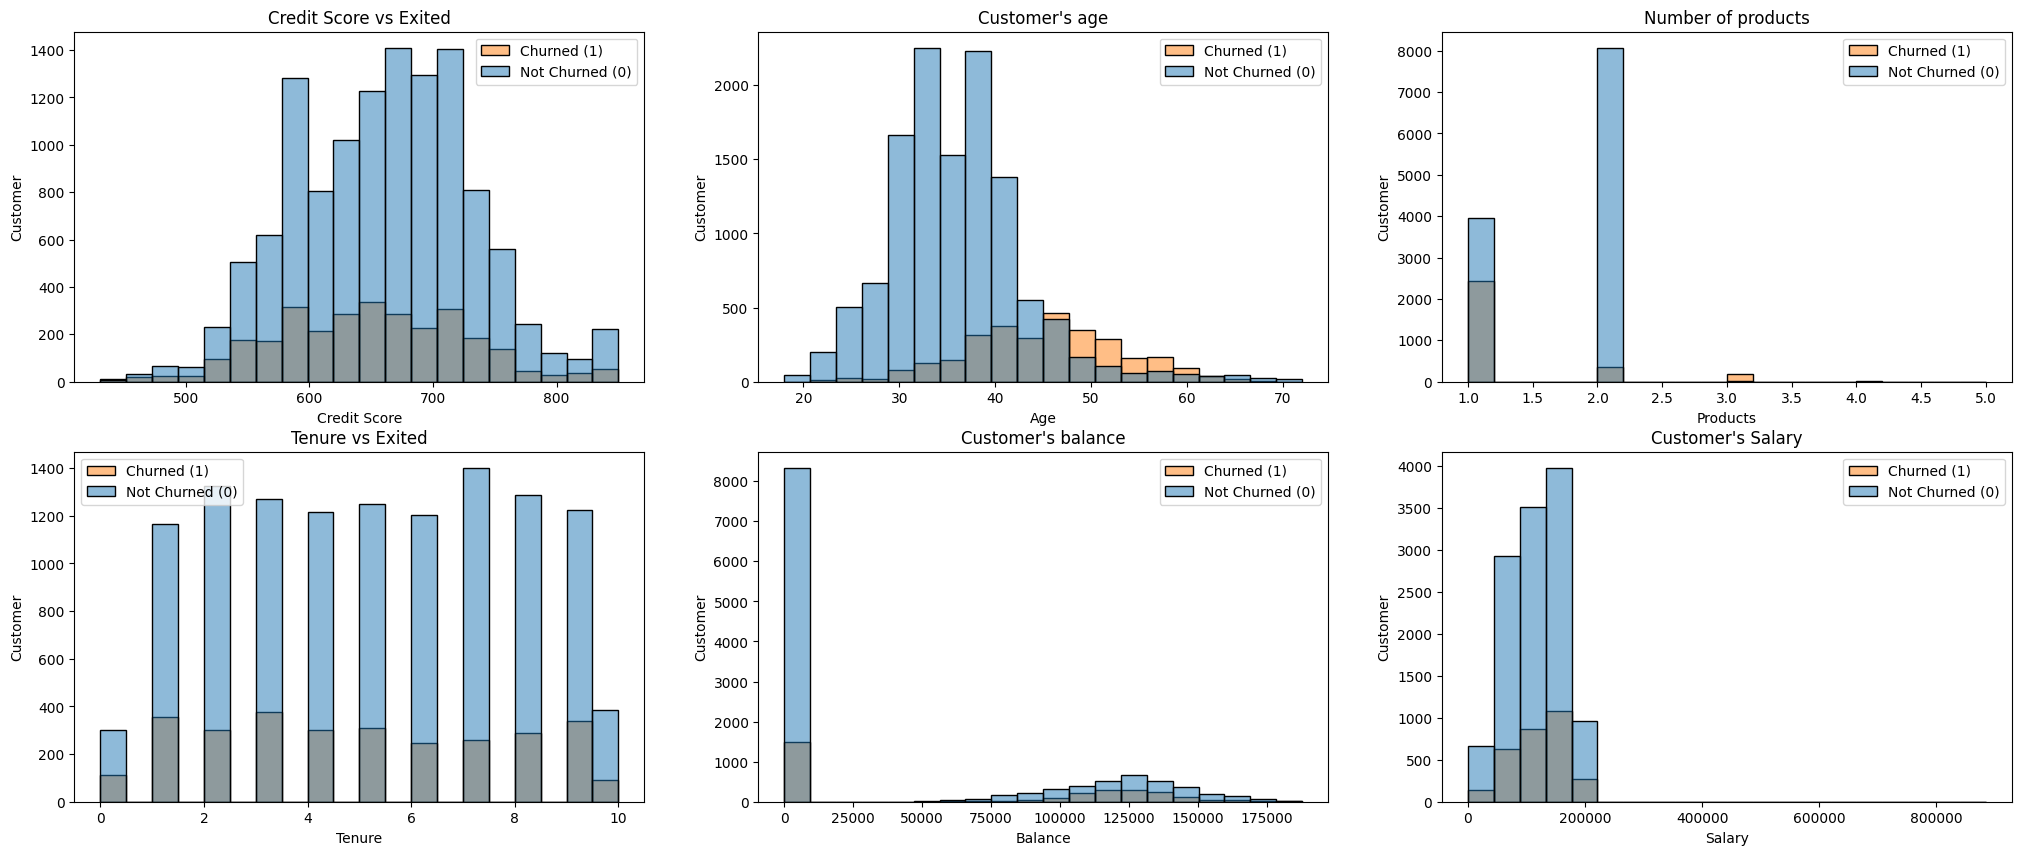

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(25, 10))



#CreditScore vs Exited
sns.histplot(x="CreditScore", data=df, bins=20, hue="Exited", ax=axes[0, 0])
axes[0, 0].set_title("Credit Score vs Exited")
axes[0, 0].set_xlabel("Credit Score")
axes[0, 0].set_ylabel("Customer")
axes[0, 0].legend(labels=["Churned (1)", "Not Churned (0)"])

# Age vs Exited
sns.histplot(x="Age", data=df, bins=20, hue="Exited", ax=axes[0, 1])
axes[0, 1].set_title("Customer's age")
axes[0, 1].set_xlabel("Age")
axes[0, 1].set_ylabel("Customer")
axes[0, 1].legend(labels=["Churned (1)", "Not Churned (0)"])

#Tenure vs Exited
sns.histplot(x="Tenure", data=df, bins=20, hue="Exited", ax=axes[1, 0])
axes[1, 0].set_title("Tenure vs Exited")
axes[1, 0].set_xlabel("Tenure")
axes[1, 0].set_ylabel("Customer")
axes[1, 0].legend(labels=["Churned (1)", "Not Churned (0)"])

#Balance vs Exited
sns.histplot(x="Balance", data=df, bins=20, hue="Exited",  ax=axes[1, 1])
axes[1, 1].set_title("Customer's balance")
axes[1, 1].set_xlabel("Balance")
axes[1, 1].set_ylabel("Customer")
axes[1, 1].legend(labels=["Churned (1)", "Not Churned (0)"])

#Estimated Salary vs Exited
sns.histplot(x="EstimatedSalary", data=df, bins=20, hue="Exited",  ax=axes[1, 2])
axes[1, 2].set_title("Customer's Salary")
axes[1, 2].set_xlabel("Salary")
axes[1, 2].set_ylabel("Customer")
axes[1, 2].legend(labels=["Churned (1)", "Not Churned (0)"])

#Number of products vs Exited
sns.histplot(x="NumOfProducts", data=df, bins=20, hue="Exited",  ax=axes[0, 2])
axes[0, 2].set_title("Number of products")
axes[0, 2].set_xlabel("Products")
axes[0, 2].set_ylabel("Customer")
axes[0, 2].legend(labels=["Churned (1)", "Not Churned (0)"])


import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")
warnings.filterwarnings("ignore", category=FutureWarning, message=".*length-1 tuple.*")



In [10]:
df.corrwith(df['Exited'], numeric_only=True).abs().sort_values(ascending=False)

Exited             1.000000
Age                0.449425
NumOfProducts      0.312812
IsActiveMember     0.188748
Balance            0.160062
CreditScore        0.052375
EstimatedSalary    0.035193
Tenure             0.032897
HasCrCard          0.010670
dtype: float64

Preprocessing

In [11]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,567.0,France,Male,33.0,9.0,0.00,2.0,1.0,0.0,156792.89,0.0
1,628.0,France,Female,38.0,3.0,0.00,1.0,1.0,1.0,51987.99,1.0
2,635.0,France,Female,29.0,3.0,0.00,2.0,1.0,1.0,113079.19,0.0
3,681.0,France,Male,28.0,6.0,0.00,2.0,1.0,0.0,14081.64,0.0
4,587.0,France,Female,27.0,5.0,0.00,2.0,1.0,0.0,158958.90,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14995,581.0,France,Male,35.0,1.0,0.00,2.0,1.0,0.0,161653.50,0.0
14996,806.0,Germany,Male,42.0,1.0,129120.64,2.0,1.0,1.0,161642.08,0.0
14997,620.0,France,Female,29.0,7.0,0.00,2.0,1.0,1.0,161579.85,0.0
14998,622.0,Germany,Male,51.0,6.0,106070.89,3.0,1.0,0.0,136869.31,1.0


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical = ['Geography', 'Gender']
numerical = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical),
    ('cat', cat_pipeline, categorical)
])


In [13]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42,stratify=y)

In [15]:
X_train_prepared=preprocessor.fit_transform(X_train)
X_test_prepared=preprocessor.transform(X_test)

In [16]:
GB=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
GB.fit(X_train_prepared, y_train)
y_pred= GB.predict(X_test_prepared)
y_proba = GB.predict_proba(X_test_prepared)[:, 1]
print('Model accuracy:',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model accuracy: 0.9
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2405
         1.0       0.79      0.67      0.73       595

    accuracy                           0.90      3000
   macro avg       0.86      0.81      0.83      3000
weighted avg       0.90      0.90      0.90      3000



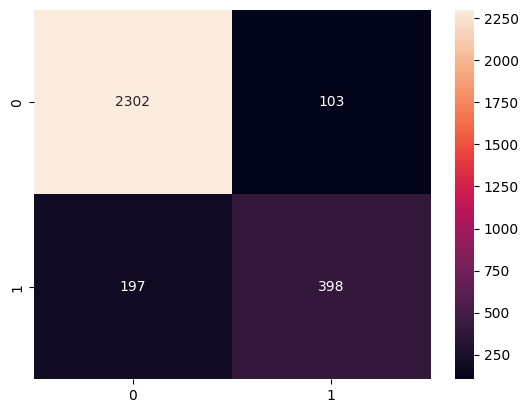

In [17]:
conf_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot=True,fmt='g')
plt.show()

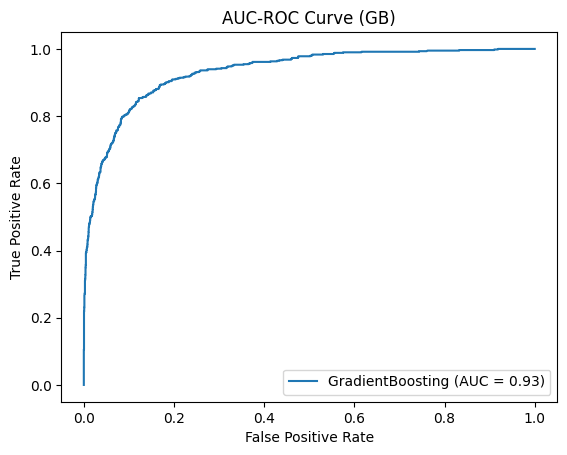

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)
roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='GradientBoosting')
display.plot()
plt.title("AUC-ROC Curve (GB)")
plt.show()

I tested Logistic, Random forest, Knn, Decision tree classifier, Gradient boosting but random forest gives best result with 89.9% accuracy

In [19]:
test_id=test.id

In [20]:
test.drop('id',axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,707.0,Germany,Male,21.0,4.0,114513.66,2.0,1.0,0.0,176692.87
1,678.0,Germany,Male,33.0,5.0,142510.50,1.0,0.0,0.0,52820.13
2,636.0,Spain,Male,45.0,9.0,0.00,2.0,1.0,1.0,125062.02
3,697.0,Spain,Male,46.0,8.0,0.00,2.0,1.0,0.0,131647.41
4,553.0,Spain,Male,31.0,2.0,0.00,2.0,1.0,0.0,58814.41
...,...,...,...,...,...,...,...,...,...,...
9995,583.0,France,Female,46.0,4.0,0.00,2.0,1.0,1.0,175071.29
9996,513.0,France,Male,42.0,4.0,148159.71,2.0,1.0,1.0,149740.22
9997,559.0,Spain,Male,52.0,7.0,117561.49,3.0,1.0,0.0,163534.36
9998,811.0,France,Female,30.0,7.0,0.00,2.0,1.0,1.0,104786.59


In [21]:
#test predict
test_prepared=preprocessor.transform(test)
test_proba=GB.predict_proba(test_prepared)
test_positive_proba = test_proba[:, 1]  
submission = pd.DataFrame({'id': test_id, 'Exited': test_positive_proba})
submission.to_csv('submission.csv', index=False)

In [22]:
submission

,id,Exited
0,15000,0.044994
1,15001,0.140319
2,15002,0.037077
3,15003,0.130232
4,15004,0.015396
...,...,...
9995,24995,0.096738
9996,24996,0.115979
9997,24997,0.993364
9998,24998,0.013178
